In [96]:
# TODO

# plotta topparnas position (cm-1) som en funktion av tiden
# -D topp
# -G topp
# -2D topp

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
operando_redlaser_df = pd.read_csv('groupe3b_CV_0.1mV_s_red_laser_C01.txt',header=None)
operando_redlaser_df = operando_redlaser_df[0].str.split(expand=True)
operando_redlaser_df.columns = operando_redlaser_df.iloc[0]
operando_redlaser_df = operando_redlaser_df.drop(0)
operando_redlaser_df.drop(['number'],axis=1)
operando_redlaser_df = operando_redlaser_df.astype(float)

operando_df = pd.read_csv('group_b_operando_2_blue_15s_x10_25p_10_cycles_C01.txt',header=None)
operando_df = operando_df[0].str.split(expand=True)
operando_df.columns = operando_df.iloc[0]
operando_df = operando_df.drop(0)
operando_df.drop(['number'],axis=1)
operando_df = operando_df.astype(float)

In [99]:
raman_df_red = pd.read_csv('run_1_full.txt',header=None)
raman_df_red = raman_df_red[0].str.split(expand=True).astype(float)
raman_df_red.iloc[0, 1:] = raman_df_red.iloc[0, :-1].values
raman_df_red.iloc[0, 0] = None 
raman_df_red.rename(columns={0:'timestamp'},inplace=True)

raman_df_red_notime = raman_df_red.drop(labels=['timestamp'],axis=1).transpose()
raman_df_red_notime.rename(columns={0:'wave number'},inplace=True)
timestamps_red = raman_df_red['timestamp'][1:].astype(int)

raman_df_red_just_raman = raman_df_red_notime.drop(labels='wave number',axis=1)
raman_df_red_just_raman = raman_df_red_just_raman.rename(columns=timestamps_red)

In [100]:
raman_df_blue = pd.read_csv('operando_blue_laser_15x10_25p_3_cycles.txt',header=None)
raman_df_blue = raman_df_blue[0].str.split(expand=True).astype(float)
raman_df_blue.iloc[0, 1:] = raman_df_blue.iloc[0, :-1].values
raman_df_blue.iloc[0, 0] = None 
raman_df_blue.rename(columns={0:'timestamp'},inplace=True)

raman_df_blue_notime = raman_df_blue.drop(labels=['timestamp'],axis=1).transpose()
raman_df_blue_notime.rename(columns={0:'wave number'},inplace=True)
timestamps_blue = raman_df_blue['timestamp'][1:].astype(int)
raman_df_blue_just_raman = raman_df_blue_notime.drop(labels='wave number',axis=1)
raman_df_blue_just_raman = raman_df_blue_just_raman.rename(columns=timestamps_blue)

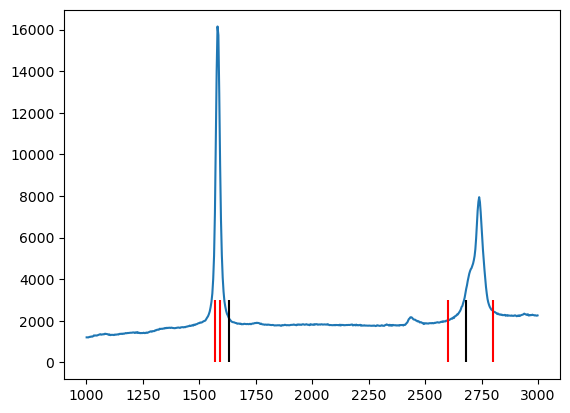

In [101]:
plt.plot(raman_df_blue_notime['wave number'],raman_df_blue_notime[26])
plt.vlines([2600,2800,1570,1590],colors='r',ymin=0,ymax=3000)
plt.vlines([1630,2680],colors='k',ymin=0,ymax=3000)

In [102]:
Dpeak_b_df = raman_df_blue_notime[(raman_df_blue_notime['wave number'] < 1400) & (raman_df_blue_notime['wave number'] > 1250)]
Gpeak_b_df = raman_df_blue_notime[(raman_df_blue_notime['wave number'] < 1700) & (raman_df_blue_notime['wave number'] > 1500)]
twoDpeak_b_df = raman_df_blue_notime[(raman_df_blue_notime['wave number'] < 2800) & (raman_df_blue_notime['wave number'] > 2600)]

Dpeaks,Gpeaks,twoDpeaks = [],[],[]

for col in range(1,raman_df_blue_notime.shape[1]):
    wn_arr = np.array(Dpeak_b_df['wave number'])
    arr1 = np.array(Dpeak_b_df[col])
    maxD = np.max(arr1)
    iD = np.where(arr1 == maxD)[0][0]
    Dpeaks.append(wn_arr[iD])

    wn_arrG = np.array(Gpeak_b_df['wave number'])
    arr2 = np.array(Gpeak_b_df[col])
    maxG = np.max(arr2)
    iG = np.where(arr2 == maxG)[0][0]
    Gpeaks.append(wn_arrG[iG])

    wn_arr2D = np.array(twoDpeak_b_df['wave number'])
    arr3 = np.array(twoDpeak_b_df[col])
    max2D = np.max(arr3)
    i2D = np.where(arr3 == max2D)[0][0]
    twoDpeaks.append(wn_arr2D[i2D])

In [130]:
fake_Dpeaks = np.ones(40) * 1300
fake_Dpeaks = fake_Dpeaks.reshape(-1,1)
real_Dpeaks = Dpeaks[40:]

real_Dpeaks = np.array(real_Dpeaks).reshape(-1,1)
Ds = np.vstack((fake_Dpeaks,real_Dpeaks))

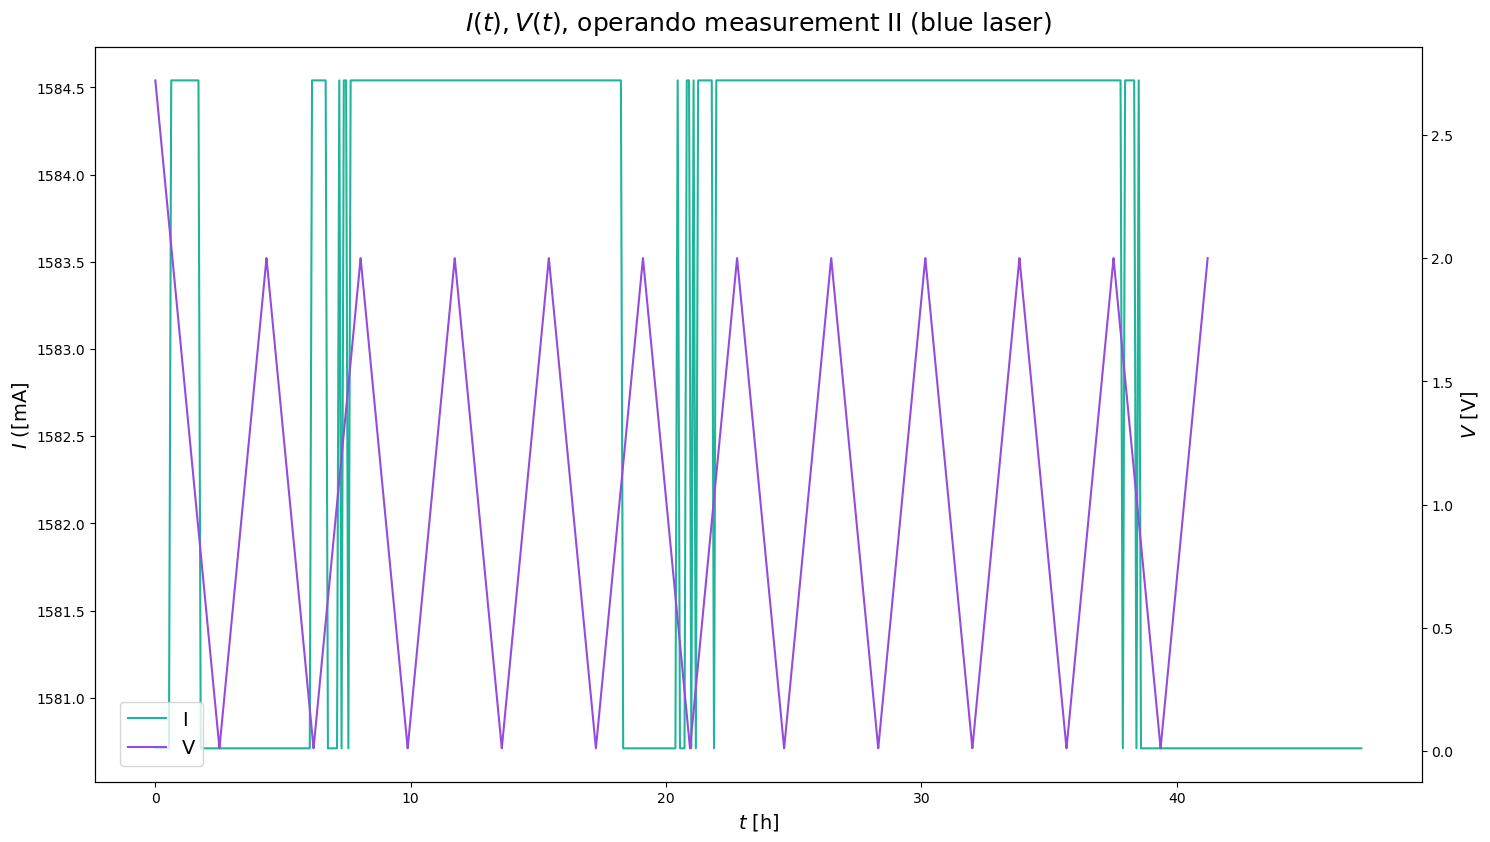

In [114]:

fig,ax1=plt.subplots(figsize=(15,10))

ax2 = ax1.twinx()  

ax1.plot(timestamps_blue/3600,Gpeaks,
        c='#22b49a',label='I')
ax2.plot(operando_df['time/s']/3600,operando_df['Ewe/V'],
        c='#954cde',label='V')
ax1.set_xlabel('$t$ [h]',fontsize=14)
ax1.set_ylabel('$I$ ([mA]',fontsize=14)
ax2.set_ylabel('$V$ [V]',fontsize=14)

ax1.set_title('$I(t), V(t)$, operando measurement II (blue laser)',fontsize=18,pad=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2, labels1 + labels2,
    loc='center', bbox_to_anchor=(0.05, 0.065), fontsize=14
)

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()


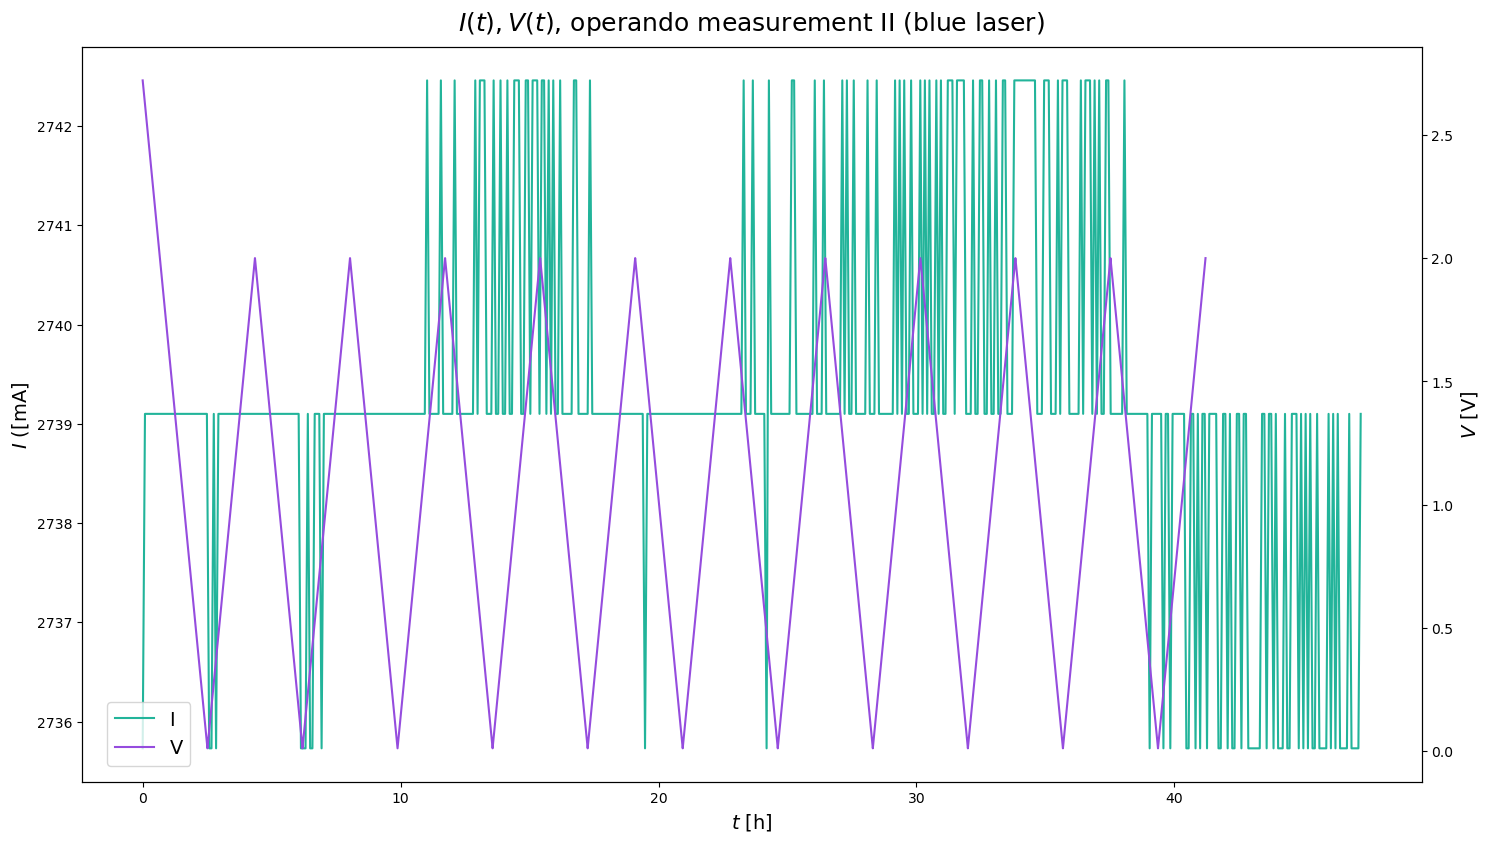

In [116]:

fig,ax1=plt.subplots(figsize=(15,10))

ax2 = ax1.twinx()  

ax1.plot(timestamps_blue/3600,twoDpeaks,
        c='#22b49a',label='I')
ax2.plot(operando_df['time/s']/3600,operando_df['Ewe/V'],
        c='#954cde',label='V')
ax1.set_xlabel('$t$ [h]',fontsize=14)
ax1.set_ylabel('$I$ ([mA]',fontsize=14)
ax2.set_ylabel('$V$ [V]',fontsize=14)

ax1.set_title('$I(t), V(t)$, operando measurement II (blue laser)',fontsize=18,pad=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2, labels1 + labels2,
    loc='center', bbox_to_anchor=(0.05, 0.065), fontsize=14
)

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()


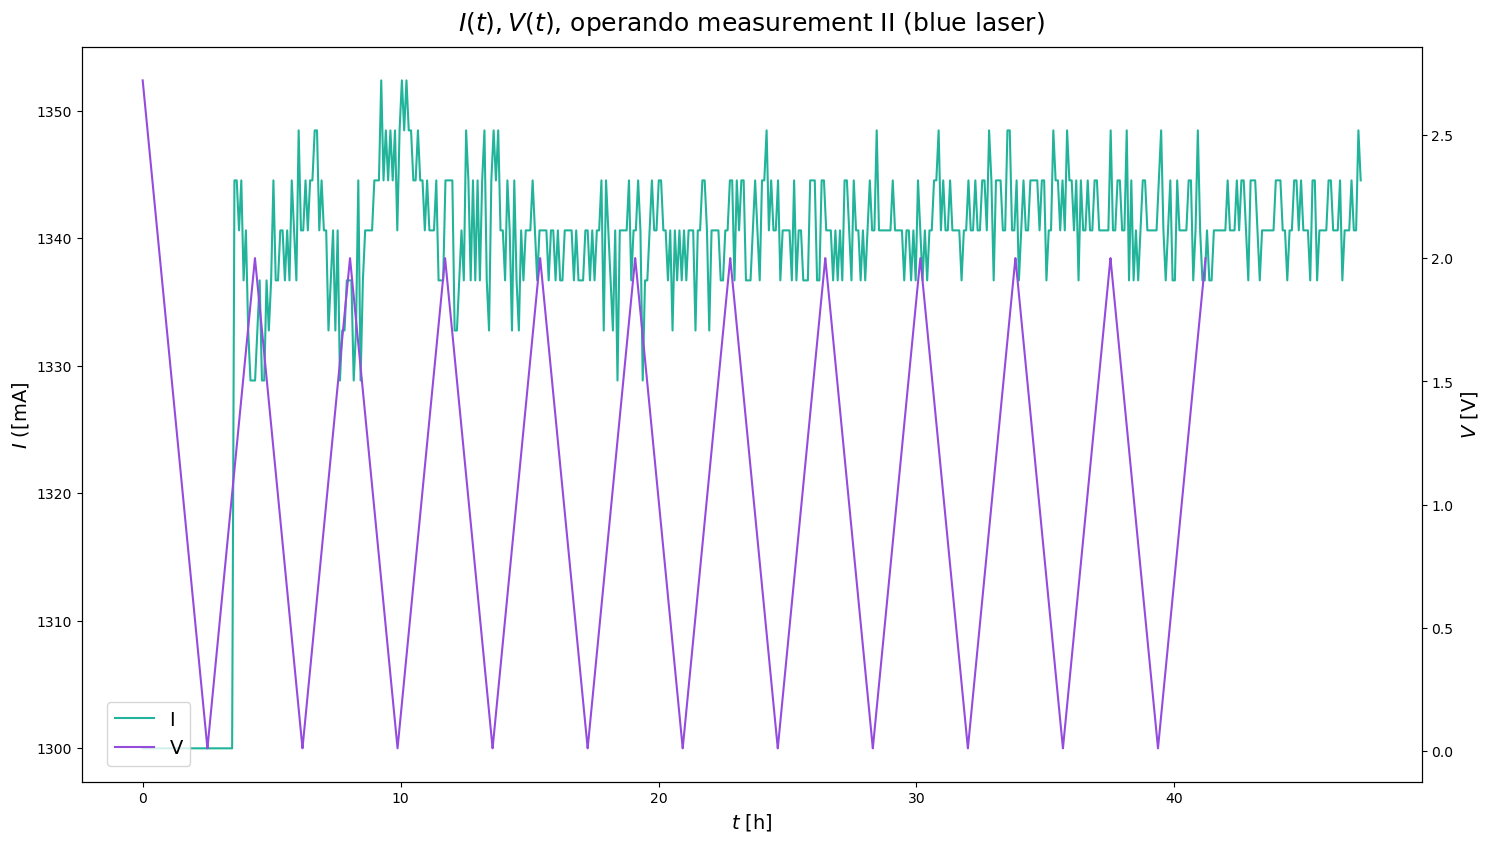

In [131]:
fig,ax1=plt.subplots(figsize=(15,10))

ax2 = ax1.twinx()  

ax1.plot(timestamps_blue/3600,Ds,
        c='#22b49a',label='I')
ax2.plot(operando_df['time/s']/3600,operando_df['Ewe/V'],
        c='#954cde',label='V')
ax1.set_xlabel('$t$ [h]',fontsize=14)
ax1.set_ylabel('$I$ ([mA]',fontsize=14)
ax2.set_ylabel('$V$ [V]',fontsize=14)

ax1.set_title('$I(t), V(t)$, operando measurement II (blue laser)',fontsize=18,pad=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2, labels1 + labels2,
    loc='center', bbox_to_anchor=(0.05, 0.065), fontsize=14
)

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()
